In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
orders=pd.read_excel('boot.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'boot.xlsx'

In [6]:
orders.head()

,user_id,revenue
0,3428,1085.327464
1,3184,1085.654927
2,2393,1087.619709
3,1766,1088.438368
4,1093,1092.040468


In [13]:
boot_it = 2000
boot_data = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = orders['revenue'].sample(len(orders['revenue']), replace = True) #sample - рандомные выборки; replace - возвращать значения в выборку
    boot_data.append(np.mean(samples))

print(f'Original: {np.mean(orders["revenue"])}, Boot: {np.mean(boot_data)}')

Original: 3740.3890325351117, Boot: 3740.9467709305027


In [11]:
len(orders['revenue'])

4230

In [12]:
orders.shape

(4230, 2)

In [14]:
#Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci = pd.Series(boot_data).quantile([left_ci, right_ci])

print(ci)

0.025    3694.213252
0.975    3784.486369
dtype: float64


In [15]:
np.percentile(boot_data, 2.5)

3694.213251946673

In [17]:
np.percentile(boot_data, 97.5)

3784.4863685172427

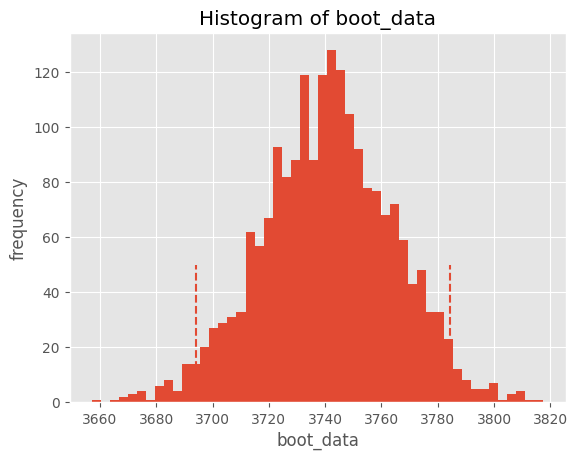

In [19]:
plt.hist(pd.Series(boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()

In [18]:
!pip install bootstrapped

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13992 sha256=10db6e1e6870f52bfddfb50ce45e158604e21b32951a143ab7b3a2ec644ef368
  Stored in directory: c:\users\st\appdata\local\pip\cache\wheels\a9\7b\e9\000ad8cb18a35a7d68051b362c96a867cd24b7b0c7b478329d
Successfully built bootstrapped


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
result=50*50

In [4]:
print(result)

2500
